In [3]:
import sys
sys.path.append("../")
from VQD_CAFQA import *
import numpy as np
import matplotlib.pyplot as plt
import scipy
from qiskit.quantum_info import Statevector
dlist = np.linspace(0.5,4,50)
%matplotlib inline

def getH2(d):
    return JWmolecule(f"H 0 0 0; H 0 0 {d}")

In [4]:
print("----------------H2----------------")
H2Hamiltonian_Data=[]
for m,d in enumerate(dlist):
    coeffs,paulis,_ = getH2(d)
    D=np.linalg.eigh(SparsePauliOp(coeffs=coeffs,data=paulis))
    l=[[D[0][i],D[1].T[i]] for i in range(len(D[0]))]
    H2Hamiltonian_Data.append( (np.array([i[0] for i in l]),np.array([i[1] for i in l]).T))
    print(f"Distance {d}")

----------------H2----------------
Distance 0.5
Distance 0.5714285714285714
Distance 0.6428571428571428
Distance 0.7142857142857143
Distance 0.7857142857142857
Distance 0.8571428571428571
Distance 0.9285714285714286
Distance 1.0
Distance 1.0714285714285714
Distance 1.1428571428571428
Distance 1.2142857142857142
Distance 1.2857142857142856
Distance 1.3571428571428572
Distance 1.4285714285714284
Distance 1.5
Distance 1.5714285714285714
Distance 1.6428571428571428
Distance 1.7142857142857142
Distance 1.7857142857142856
Distance 1.857142857142857
Distance 1.9285714285714284
Distance 2.0
Distance 2.071428571428571
Distance 2.142857142857143
Distance 2.2142857142857144
Distance 2.2857142857142856
Distance 2.3571428571428568
Distance 2.4285714285714284
Distance 2.5
Distance 2.571428571428571
Distance 2.642857142857143
Distance 2.714285714285714
Distance 2.7857142857142856
Distance 2.857142857142857
Distance 2.9285714285714284
Distance 3.0
Distance 3.071428571428571
Distance 3.142857142857143


In [5]:
from qiskit.quantum_info import Statevector

### h2
N_operator = N_op(4)
S2_operator=S2(4)
SZ_operator=S_z(4)

H2_singlet_energies = []
H2_triplet_energies = []
H2_cation_energies = []
H2_anion_energies = []

for m,i in enumerate(H2Hamiltonian_Data):
    singlet_l=[]
    triplet_l=[]
    cation_l=[]
    anion_l=[]
    
    s=i[1].T
    for k,j in enumerate(s):
        state=Statevector(j)
        N=round(state.expectation_value(SparsePauliOp(coeffs=N_operator.coeffs,data=[p[::-1] for p in N_operator.paulis.to_labels()])).real)
        SpinTotal=round(state.expectation_value(SparsePauliOp(coeffs=S2_operator.coeffs,data=[p for p in S2_operator.paulis.to_labels()])).real*4)/4
        SpinZ=round(state.expectation_value(SparsePauliOp(coeffs=SZ_operator.coeffs,data=[p[::-1] for p in SZ_operator.paulis.to_labels()])).real*2)/2
        if(N==2 and SpinTotal == 0 and len(singlet_l)<2):
            singlet_l.append(i[0][k].real)
        if(N==2 and SpinTotal == 2 and len(triplet_l)==0):
            triplet_l.append(i[0][k].real)
        if(N==3 and SpinTotal == 3/4 and len(cation_l)==0):
            cation_l.append(i[0][k].real)
        if(N==1 and SpinTotal == 3/4 and len(anion_l)==0):
            anion_l.append(i[0][k].real)
        if(len(singlet_l)==2 and len(triplet_l)==1 and len(cation_l)==1 and len(anion_l)==1):
            break
    H2_singlet_energies.append(singlet_l)
    H2_triplet_energies.append(triplet_l)
    H2_anion_energies.append(anion_l)
    H2_cation_energies.append(cation_l)
    print(f"Distance: {dlist[m]}")

Distance: 0.5
Distance: 0.5714285714285714
Distance: 0.6428571428571428
Distance: 0.7142857142857143
Distance: 0.7857142857142857
Distance: 0.8571428571428571
Distance: 0.9285714285714286
Distance: 1.0
Distance: 1.0714285714285714
Distance: 1.1428571428571428
Distance: 1.2142857142857142
Distance: 1.2857142857142856
Distance: 1.3571428571428572
Distance: 1.4285714285714284
Distance: 1.5
Distance: 1.5714285714285714
Distance: 1.6428571428571428
Distance: 1.7142857142857142
Distance: 1.7857142857142856
Distance: 1.857142857142857
Distance: 1.9285714285714284
Distance: 2.0
Distance: 2.071428571428571
Distance: 2.142857142857143
Distance: 2.2142857142857144
Distance: 2.2857142857142856
Distance: 2.3571428571428568
Distance: 2.4285714285714284
Distance: 2.5
Distance: 2.571428571428571
Distance: 2.642857142857143
Distance: 2.714285714285714
Distance: 2.7857142857142856
Distance: 2.857142857142857
Distance: 2.9285714285714284
Distance: 3.0
Distance: 3.071428571428571
Distance: 3.1428571428571

In [ ]:
Q_CAFQA_energiesList=np.genfromtxt("Q_CAFQA_energiesList.csv", delimiter=",")
A_CAFQA_energiesList=np.genfromtxt("A_CAFQA_energiesList.csv", delimiter=",")

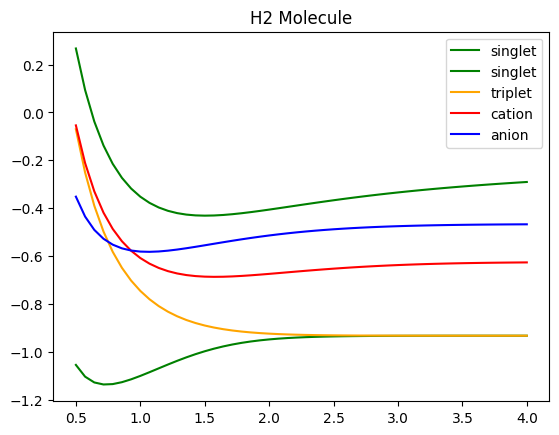

In [6]:
plt.title("H2 Molecule")
plt.plot(dlist,H2_singlet_energies,color='green',label='singlet')
plt.plot(dlist,H2_triplet_energies,color='orange',label='triplet')
plt.plot(dlist,H2_cation_energies,color='red',label='cation')
plt.plot(dlist,H2_anion_energies,color='blue',label='anion')
plt.legend()